# Chatbot with Python and Open Source LLMs

## Installing required libraries

In [3]:
!pip install huggingface
!pip install transformers
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.2 MB/s eta 0:00:

In [4]:
# Importing necessary libraries
from transformers import AutoTokenizer
import gradio as gr
from transformers import pipeline

model = 'deepset/roberta-base-squad2' # The model used is deepset/roberta-base-squad2
tokenizer = AutoTokenizer.from_pretrained(model) # To enable the same tokenization on which the model was trained on

In [8]:
# Creating a "question-answering" Hugging Face pipeline
nlp = pipeline("question-answering", model=model, tokenizer=tokenizer)

# Sample test cases
context = '''My name is RP and I love working on the LLMs and Generative AI
and I live in Bangalore
'''
question = "what is my name?"
result = nlp(question = question, context=context)
result

{'score': 0.8393333554267883, 'start': 11, 'end': 13, 'answer': 'RP'}

In [9]:
question = "what do I love?"
result = nlp(question = question, context=context)
result

{'score': 0.6185383200645447,
 'start': 25,
 'end': 62,
 'answer': 'working on the LLMs and Generative AI'}

## Chatbot UI 1

In [42]:
# Creating the function tp wrap in Gradio UI
def get_answer(context, question):
  """
  Parameters:
  context: String containing the context given by user
  question: String containing the question asked by user

  Returns: String of the answer to the parameter "question"
  """
  result = nlp(question = question, context=context)
  return result['answer']

# Creating the Gradio Chatbot Interface
app = gr.Interface(
    fn=get_answer,
    inputs = ['textbox', 'text'],
    outputs = 'textbox',
    title = "Tahiyya Khan's Bot 🤖😊",
    theme = gr.themes.Soft(),
    description = 'Provide your context and ask the Chatbot a question to get an answer!')

# launching the Chatbot app
app.launch(inline=False,share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://da79a1a3a465d0d4c2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### Output Screenshot

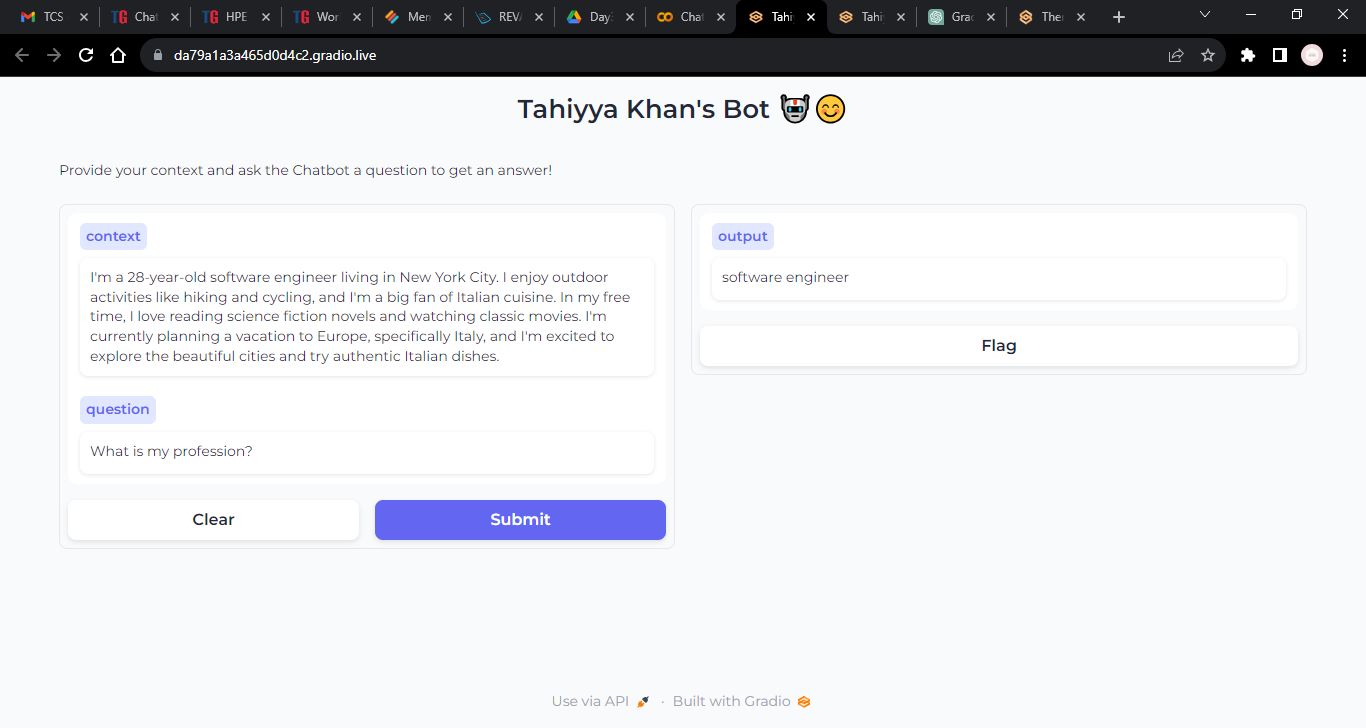

* I have generated a Gradio UI with Soft theme for my chatbot.
* I have included two input boxes, one each for context and question.

## Chatbot UI 2

In [43]:
with gr.Blocks() as app:
    context = gr.Textbox(label="Context")
    question = gr.Textbox(label="Question")
    output = gr.Textbox(label="Answer")
    greet_btn = gr.Button("Answer my question")
    greet_btn.click(fn=get_answer, inputs=[context, question], outputs=output, api_name="answer")

# launching the Chatbot app
app.launch(inline=False,share = True)

{'targets': [(312, 'click')],
 'inputs': [309, 310],
 'outputs': [311],
 'backend_fn': True,
 'js': None,
 'queue': None,
 'api_name': 'answer',
 'scroll_to_output': False,
 'show_progress': 'full',
 'every': None,
 'batch': False,
 'max_batch_size': 4,
 'cancels': [],
 'types': {'continuous': False, 'generator': False},
 'collects_event_data': False,
 'trigger_after': None,
 'trigger_only_on_success': False}

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4f92cbb81688f60f35.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### Output Screenshot

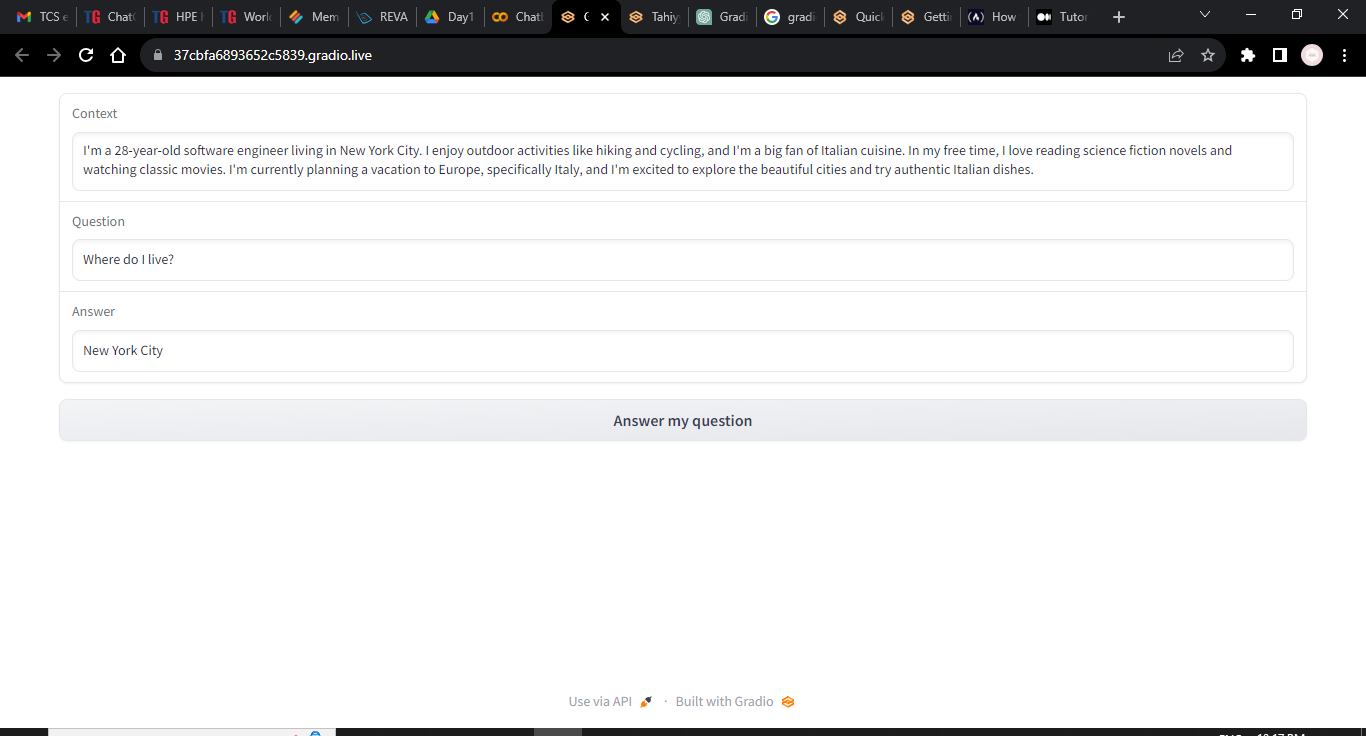

* I have generated a Gradio UI with the concept of Blocks for my next chatbot.
* I have included two input boxes, one each for context and question and an output box.

In [44]:
%%shell
jupyter nbconvert --to html Assignment2_Chatbot_with_LLM.ipynb

[NbConvertApp] Converting notebook Assignment2_Chatbot_with_LLM.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 285, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 560, in convert_single_notebook
    output, resources = self.export_single_notebook(
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconv

CalledProcessError: ignored